# GRIP At The Sparks Foundation

## Name: Bagwe Sarvesh 

## Task 2 : Prediction Using Unsupervised ML

### From the given dataset, predict the optimum number of clusters and represent it visually.

#### Importing the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
Data = pd.read_csv("Iris.csv") 
Data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
points = Data.iloc[:,1:5].values
points

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
name_clusters = Data.Species.unique()
print(name_clusters)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Using Elbow method to find number of clusters

In [5]:
from sklearn.cluster import KMeans
cluster_value = []

for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(points)
    cluster_value.append(kmeans.inertia_)
    
print (cluster_value)

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.317873214285726, 46.535582051282034, 38.930963049671746, 34.31875322061191, 29.95408642103723, 27.992635739389623, 25.94725937001596, 24.44593206793208, 23.005555819180806, 21.913784823020123, 20.643787666581787]


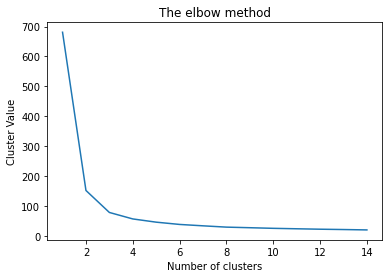

In [6]:
 
plt.plot(range(1, 15),cluster_value)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster Value') 
plt.show()

As we can see the elbow occurs at value 3 so will take 3 clusters for our k-means algorithm 


### Applying K-Means Algorithm

In [7]:
# Creating Kmeans object
Kmeans = KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 42)



In [8]:
#fitting the data
z=Kmeans.fit_predict(points)

#finding the centers of the clusters
cluster_centers = Kmeans.cluster_centers_
print(cluster_centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


### Visualization of the clusters

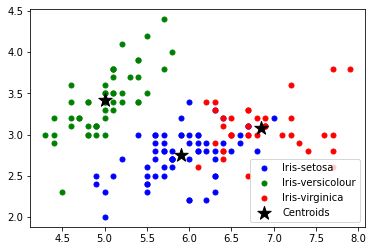

In [9]:

plt.scatter(points[z == 0, 0], points[z == 0, 1], 
            s = 25, c = 'blue', label = 'Iris-setosa')
plt.scatter(points[z == 1, 0], points[z == 1, 1], 
            s = 25, c = 'green', label = 'Iris-versicolour')
plt.scatter(points[z == 2, 0], points[z == 2, 1],
            s = 25, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters

plt.scatter(cluster_centers[0][0],cluster_centers[0][1], marker='*', color='black',s=200)
plt.scatter(cluster_centers[1][0],cluster_centers[1][1], marker='*', color='black',s=200,label="Centroids")
plt.scatter(cluster_centers[2][0],cluster_centers[2][1], marker='*', color='black',s=200)





plt.legend()